In [1]:
import pandas as pd

In [3]:
# Sample dataset
data = {
    'Study_Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Sleep_Hours': [8, 7, 6, 6, 5, 5, 4, 4, 3, 3],
    'Practice_Tests': [1, 1, 2, 2, 3, 3, 4, 5, 5, 6],
    'Passed': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}
data


{'Study_Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Sleep_Hours': [8, 7, 6, 6, 5, 5, 4, 4, 3, 3],
 'Practice_Tests': [1, 1, 2, 2, 3, 3, 4, 5, 5, 6],
 'Passed': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]}

In [5]:
df=pd.DataFrame(data)
df

,Study_Hours,Sleep_Hours,Practice_Tests,Passed
0,1,8,1,0
1,2,7,1,0
2,3,6,2,0
3,4,6,2,1
4,5,5,3,1
5,6,5,3,1
6,7,4,4,1
7,8,4,5,1
8,9,3,5,1
9,10,3,6,1


In [7]:
df.to_csv("student_performance.csv", index=False)

In [9]:
data = pd.read_csv("student_performance.csv")


In [11]:
data

,Study_Hours,Sleep_Hours,Practice_Tests,Passed
0,1,8,1,0
1,2,7,1,0
2,3,6,2,0
3,4,6,2,1
4,5,5,3,1
5,6,5,3,1
6,7,4,4,1
7,8,4,5,1
8,9,3,5,1
9,10,3,6,1


In [13]:
from sklearn.model_selection import train_test_split
x=data[['Study_Hours', 'Sleep_Hours', 'Practice_Tests']]
y = data['Passed']


In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.2, random_state=42)

In [51]:
x_train

,Study_Hours,Sleep_Hours,Practice_Tests
5,6,5,3
0,1,8,1
7,8,4,5
2,3,6,2
9,10,3,6
4,5,5,3
3,4,6,2
6,7,4,4


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Model without scaling
model1 = LogisticRegression()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

print("⚙️ Accuracy without scaling:", accuracy_score(y_test, y_pred1))


⚙️ Accuracy without scaling: 1.0


In [55]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Model with scaling
model2 = LogisticRegression()
model2.fit(X_train_scaled, y_train)
y_pred2 = model2.predict(X_test_scaled)

print("🚀 Accuracy with StandardScaler:", accuracy_score(y_test, y_pred2))


🚀 Accuracy with StandardScaler: 1.0


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [61]:
data.describe()

,Study_Hours,Sleep_Hours,Practice_Tests,Passed
count,10.00000,10.00000,10.00000,10.000000
mean,5.50000,5.10000,3.20000,0.700000
std,3.02765,1.66333,1.75119,0.483046
min,1.00000,3.00000,1.00000,0.000000
25%,3.25000,4.00000,2.00000,0.250000
50%,5.50000,5.00000,3.00000,1.000000
75%,7.75000,6.00000,4.75000,1.000000
max,10.00000,8.00000,6.00000,1.000000


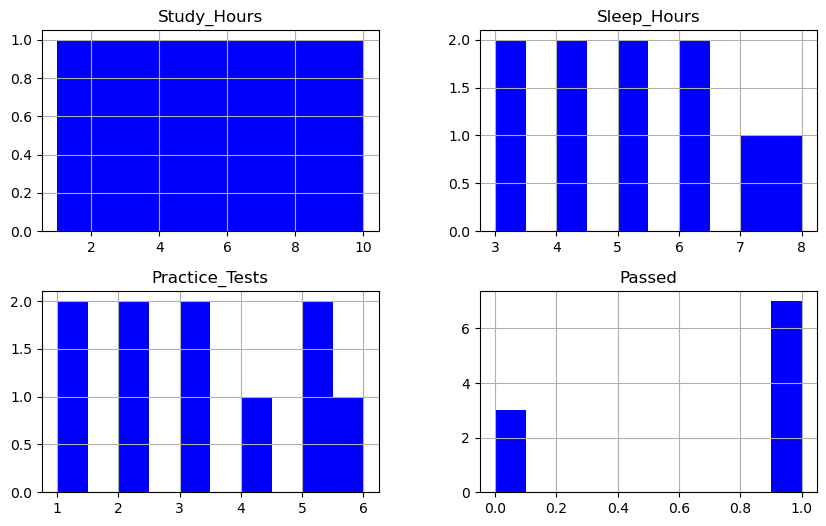

In [65]:
data.hist(figsize=(10,6), bins=10, color='b' )
plt.show()

C:\Users\chethan kiruvase\AppData\Local\Temp\ipykernel_17148\1131542169.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\chethan kiruvase\AppData\Local\Temp\ipykernel_17148\1131542169.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\chethan kiruvase\AppData\Local\Temp\ipykernel_17148\1131542169.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


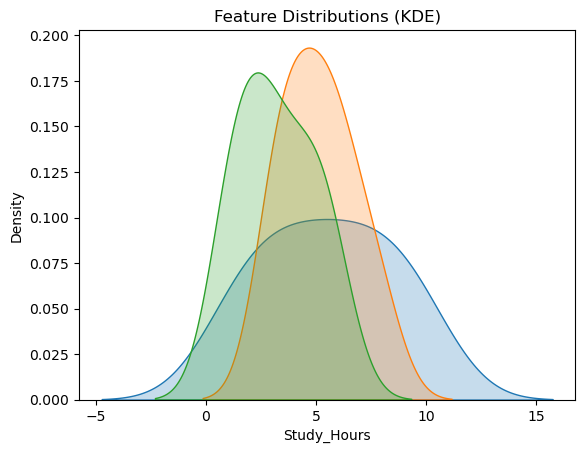

In [67]:
for col in ['Study_Hours', 'Sleep_Hours', 'Practice_Tests']:
    sns.kdeplot(data[col], shade=True)
plt.title("Feature Distributions (KDE)")
plt.show()

C:\Users\chethan kiruvase\AppData\Local\Temp\ipykernel_17148\1502485685.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Passed', data=data, palette='cool')


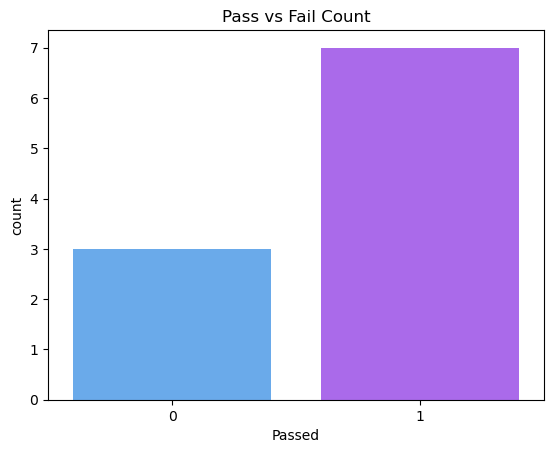

In [69]:
sns.countplot(x='Passed', data=data, palette='cool')
plt.title("Pass vs Fail Count")
plt.show()


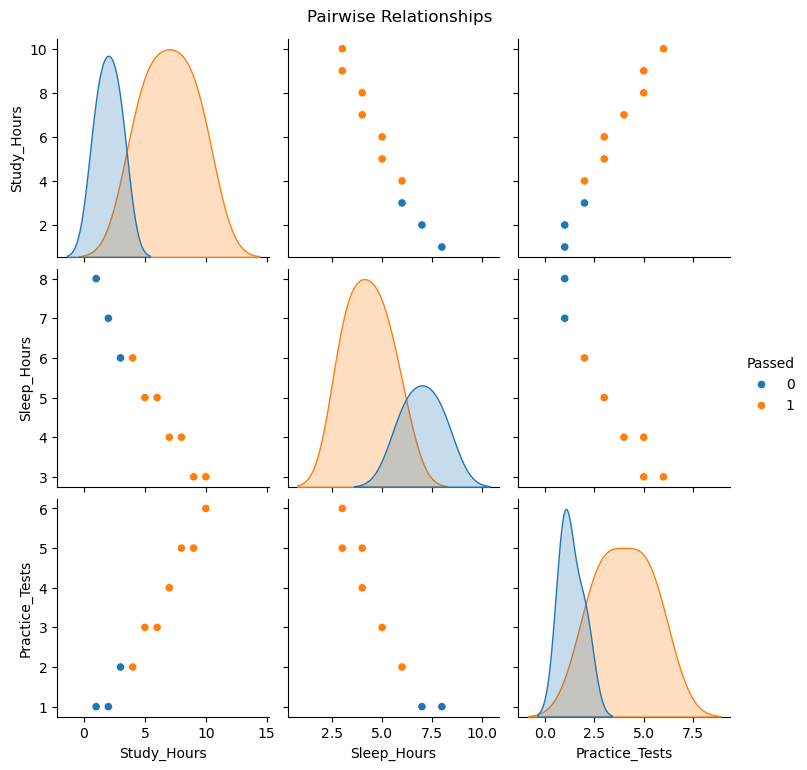

In [75]:
sns.pairplot(data, hue='Passed', diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


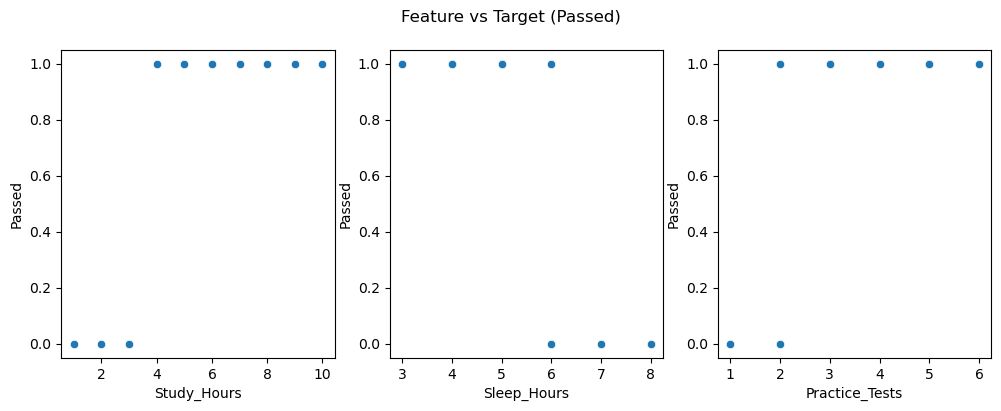

In [77]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.scatterplot(x='Study_Hours', y='Passed', data=data)
plt.subplot(1,3,2)
sns.scatterplot(x='Sleep_Hours', y='Passed', data=data)
plt.subplot(1,3,3)
sns.scatterplot(x='Practice_Tests', y='Passed', data=data)
plt.suptitle("Feature vs Target (Passed)")
plt.show()


In [79]:
corr = data.corr(numeric_only=True)
print(corr)


                Study_Hours  Sleep_Hours  Practice_Tests    Passed
Study_Hours        1.000000    -0.981823        0.984955  0.797724
Sleep_Hours       -0.981823     1.000000       -0.961272 -0.788253
Practice_Tests     0.984955    -0.961272        1.000000  0.735570
Passed             0.797724    -0.788253        0.735570  1.000000


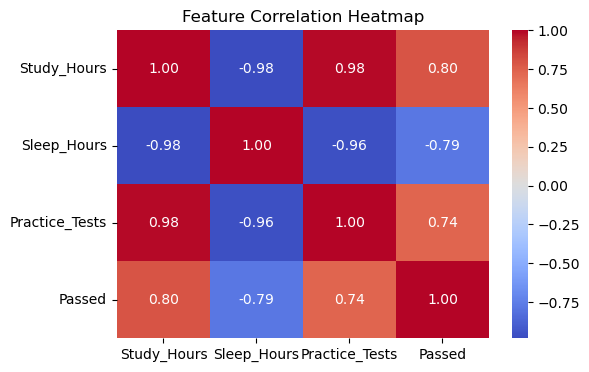

In [81]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


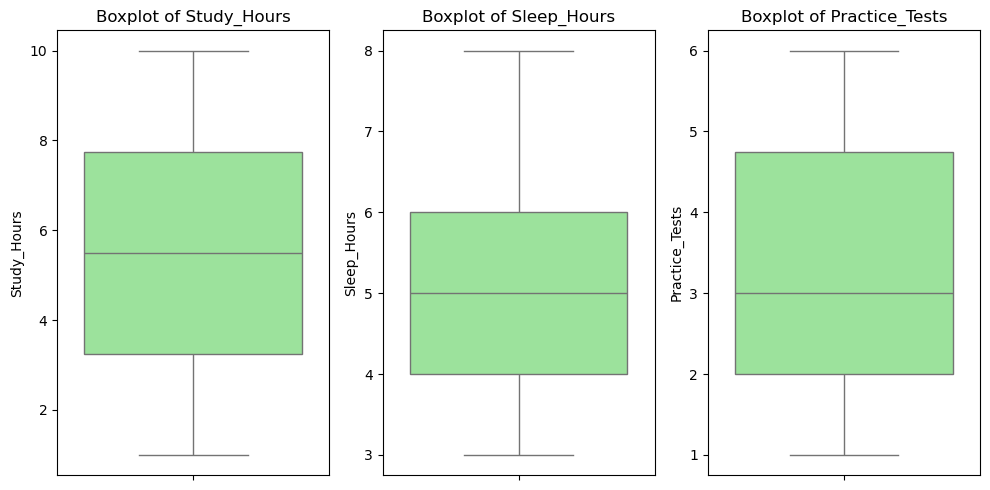

In [83]:
plt.figure(figsize=(10,5))
for i, col in enumerate(['Study_Hours', 'Sleep_Hours', 'Practice_Tests']):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=data[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


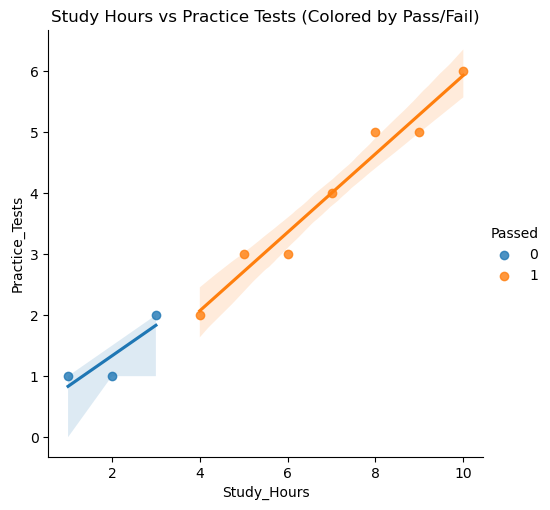

In [85]:
sns.lmplot(x='Study_Hours', y='Practice_Tests', data=data, hue='Passed', fit_reg=True)
plt.title("Study Hours vs Practice Tests (Colored by Pass/Fail)")
plt.show()


       Study_Hours  Sleep_Hours  Practice_Tests     Passed
count     10.00000     10.00000        10.00000  10.000000
mean       5.50000      5.10000         3.20000   0.700000
std        3.02765      1.66333         1.75119   0.483046
min        1.00000      3.00000         1.00000   0.000000
25%        3.25000      4.00000         2.00000   0.250000
50%        5.50000      5.00000         3.00000   1.000000
75%        7.75000      6.00000         4.75000   1.000000
max       10.00000      8.00000         6.00000   1.000000


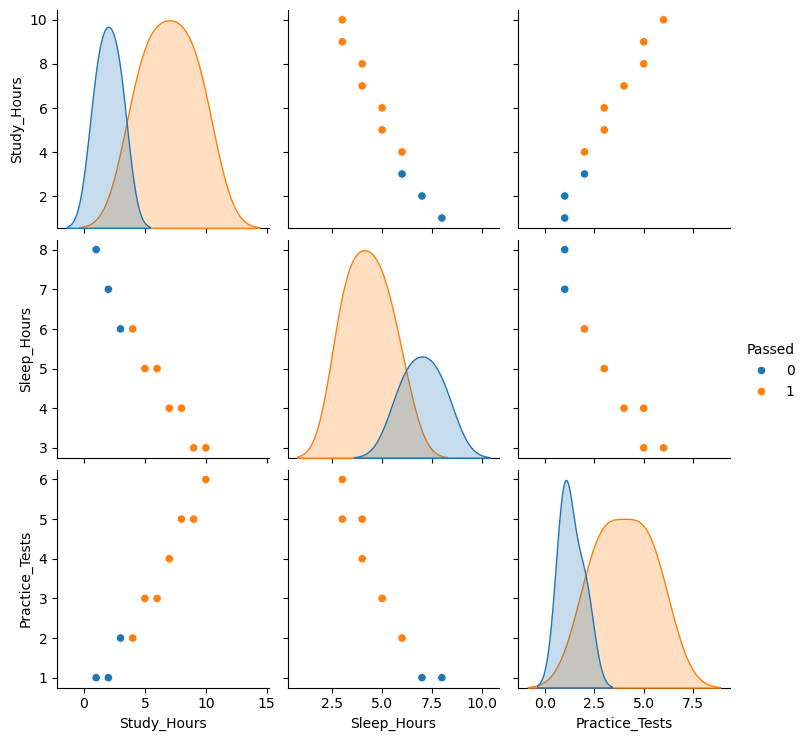

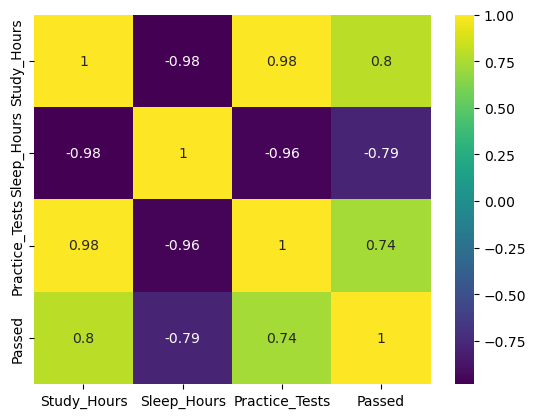

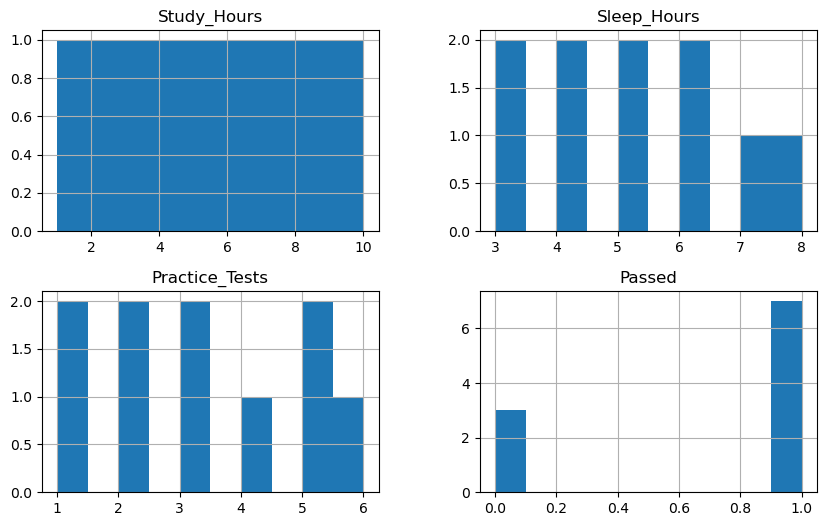

In [89]:
def run_eda(data):
    print(df.describe())
    sns.pairplot(data, hue='Passed')
    plt.show()
    sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='viridis')
    plt.show()
    df.hist(figsize=(10,6))
    plt.show()
    
run_eda(data)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv("student_performance.csv")

# Select only numeric features
features = ['Study_Hours', 'Sleep_Hours', 'Practice_Tests']
X = df[features]

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
scaled_df = pd.DataFrame(X_scaled, columns=features)

print("Before Scaling:\n", X.describe(), "\n")
print("After Scaling:\n", scaled_df.describe())


Before Scaling:
        Study_Hours  Sleep_Hours  Practice_Tests
count     10.00000     10.00000        10.00000
mean       5.50000      5.10000         3.20000
std        3.02765      1.66333         1.75119
min        1.00000      3.00000         1.00000
25%        3.25000      4.00000         2.00000
50%        5.50000      5.00000         3.00000
75%        7.75000      6.00000         4.75000
max       10.00000      8.00000         6.00000 

After Scaling:
         Study_Hours   Sleep_Hours  Practice_Tests
count  1.000000e+01  1.000000e+01    1.000000e+01
mean  -6.661338e-17  2.220446e-16   -1.110223e-16
std    1.054093e+00  1.054093e+00    1.054093e+00
min   -1.566699e+00 -1.330821e+00   -1.324244e+00
25%   -7.833495e-01 -6.970967e-01   -7.223151e-01
50%    0.000000e+00 -6.337243e-02   -1.203859e-01
75%    7.833495e-01  5.703518e-01    9.329904e-01
max    1.566699e+00  1.837800e+00    1.685402e+00


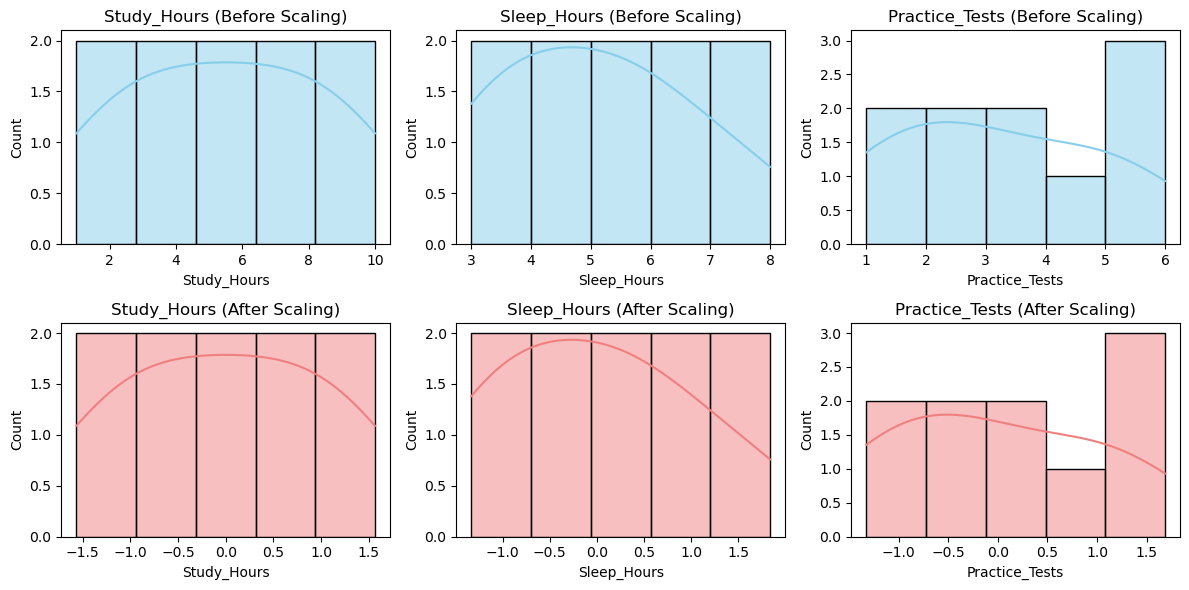

In [3]:
plt.figure(figsize=(12,6))

for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(X[col], color='skyblue', kde=True)
    plt.title(f"{col} (Before Scaling)")
    
    plt.subplot(2, 3, i+4)
    sns.histplot(scaled_df[col], color='lightcoral', kde=True)
    plt.title(f"{col} (After Scaling)")

plt.tight_layout()
plt.show()


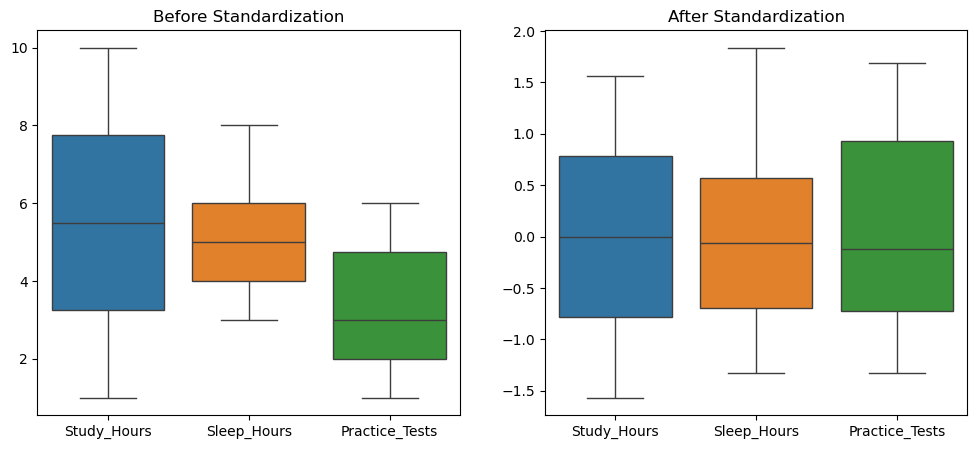

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=X, ax=axes[0])
axes[0].set_title("Before Standardization")

sns.boxplot(data=scaled_df, ax=axes[1])
axes[1].set_title("After Standardization")

plt.show()


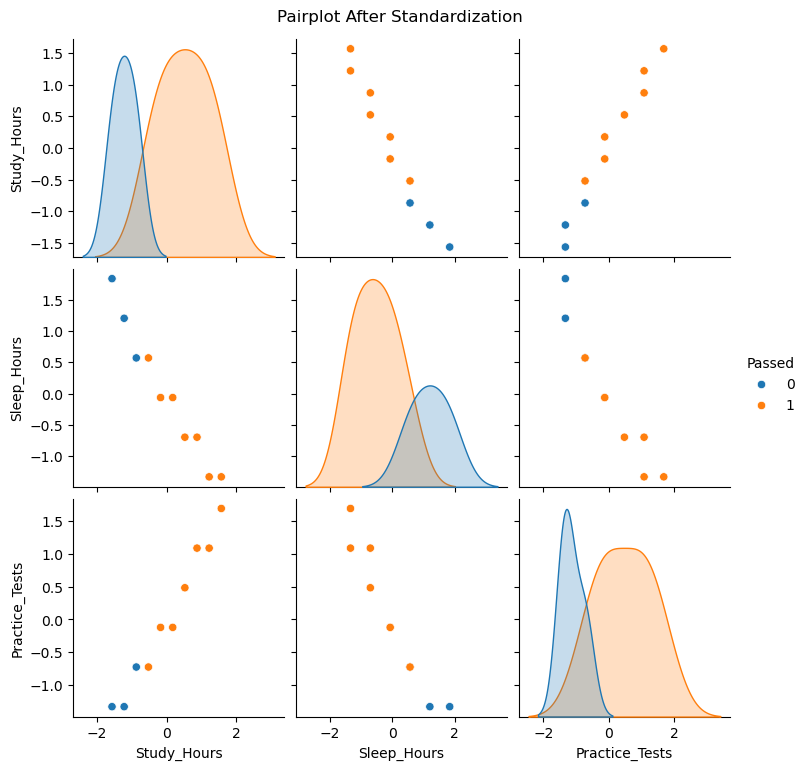

In [7]:
scaled_df['Passed'] = df['Passed']
sns.pairplot(scaled_df, hue='Passed', diag_kind='kde')
plt.suptitle("Pairplot After Standardization", y=1.02)
plt.show()


In [9]:
print("Feature Means Before Scaling:\n", X.mean())
print("\nFeature Means After Scaling:\n", scaled_df[features].mean())

print("\nFeature Std Before Scaling:\n", X.std())
print("\nFeature Std After Scaling:\n", scaled_df[features].std())


Feature Means Before Scaling:
 Study_Hours       5.5
Sleep_Hours       5.1
Practice_Tests    3.2
dtype: float64

Feature Means After Scaling:
 Study_Hours      -6.661338e-17
Sleep_Hours       2.220446e-16
Practice_Tests   -1.110223e-16
dtype: float64

Feature Std Before Scaling:
 Study_Hours       3.02765
Sleep_Hours       1.66333
Practice_Tests    1.75119
dtype: float64

Feature Std After Scaling:
 Study_Hours       1.054093
Sleep_Hours       1.054093
Practice_Tests    1.054093
dtype: float64
